In [29]:
from numpy import * 
import numpy as np

In [30]:
def loadDataSet():
    dataMat=[];labelMat=[]
    fr=open('testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1.0,float(lineArr[0]),float(lineArr[1])])#x0=1
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

In [31]:
def sigmoid(inX):
    return 1.0/(1+exp(-inX))

In [32]:
def gradAscent(dataMatIn,classLabels):
    dataMatrix=mat(dataMatIn)
    labelMat=mat(classLabels).transpose()
    m,n=shape(dataMatrix)
    alpha=0.001
    maxCycles=500
    weights=ones((n,1))
    for k in range(maxCycles):
        h=sigmoid(dataMatrix*weights)
        error=labelMat-h#向量减法
        weights=weights+alpha*dataMatrix.transpose()*error
    return weights

In [33]:
% matplotlib inline

In [35]:
def stocGradAscent0(dataMatrix,classLabels):
    m,n=shape(dataMatrix)
    alpha=0.01
    weights=ones(n)
    for i in range(m):
        h=sigmoid(sum(dataMatrix[i]*weights))
        error=classLabels[i]-h
        weights=weights+alpha*error*dataMatrix[i]
    return weights

In [36]:
dataArr,labelMat=loadDataSet()

In [37]:
weights=stocGradAscent0(array(dataArr),labelMat)

In [42]:
import matplotlib.pyplot as plt   

In [43]:
dataMat,labelMat=loadDataSet()

In [45]:
dataArr=array(dataMat)

In [68]:
n=shape(dataArr)[0]
xcord1=[];ycord1=[]
xcord2=[];ycord2=[]

In [69]:
  for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])

In [70]:
size(xcord1)

53

In [71]:
size(ycord1)

53

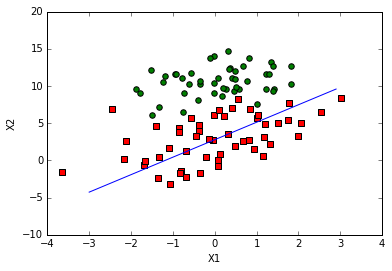

In [77]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(array(xcord1),array(ycord1),s=30,c='red',marker='s')
ax.scatter(xcord2,ycord2,s=30,c='green')
x=arange(-3.0,3.0,0.1)
y=(-weights[0]-weights[1]*x)/weights[2]##由sigmoid 可知：0=w0+w1*x1+w2*x2为分类线,x为x1,y为x2，绘制x1与x2的关系
ax.plot(x,y)
plt.xlabel('X1');plt.ylabel('X2')
plt.show()